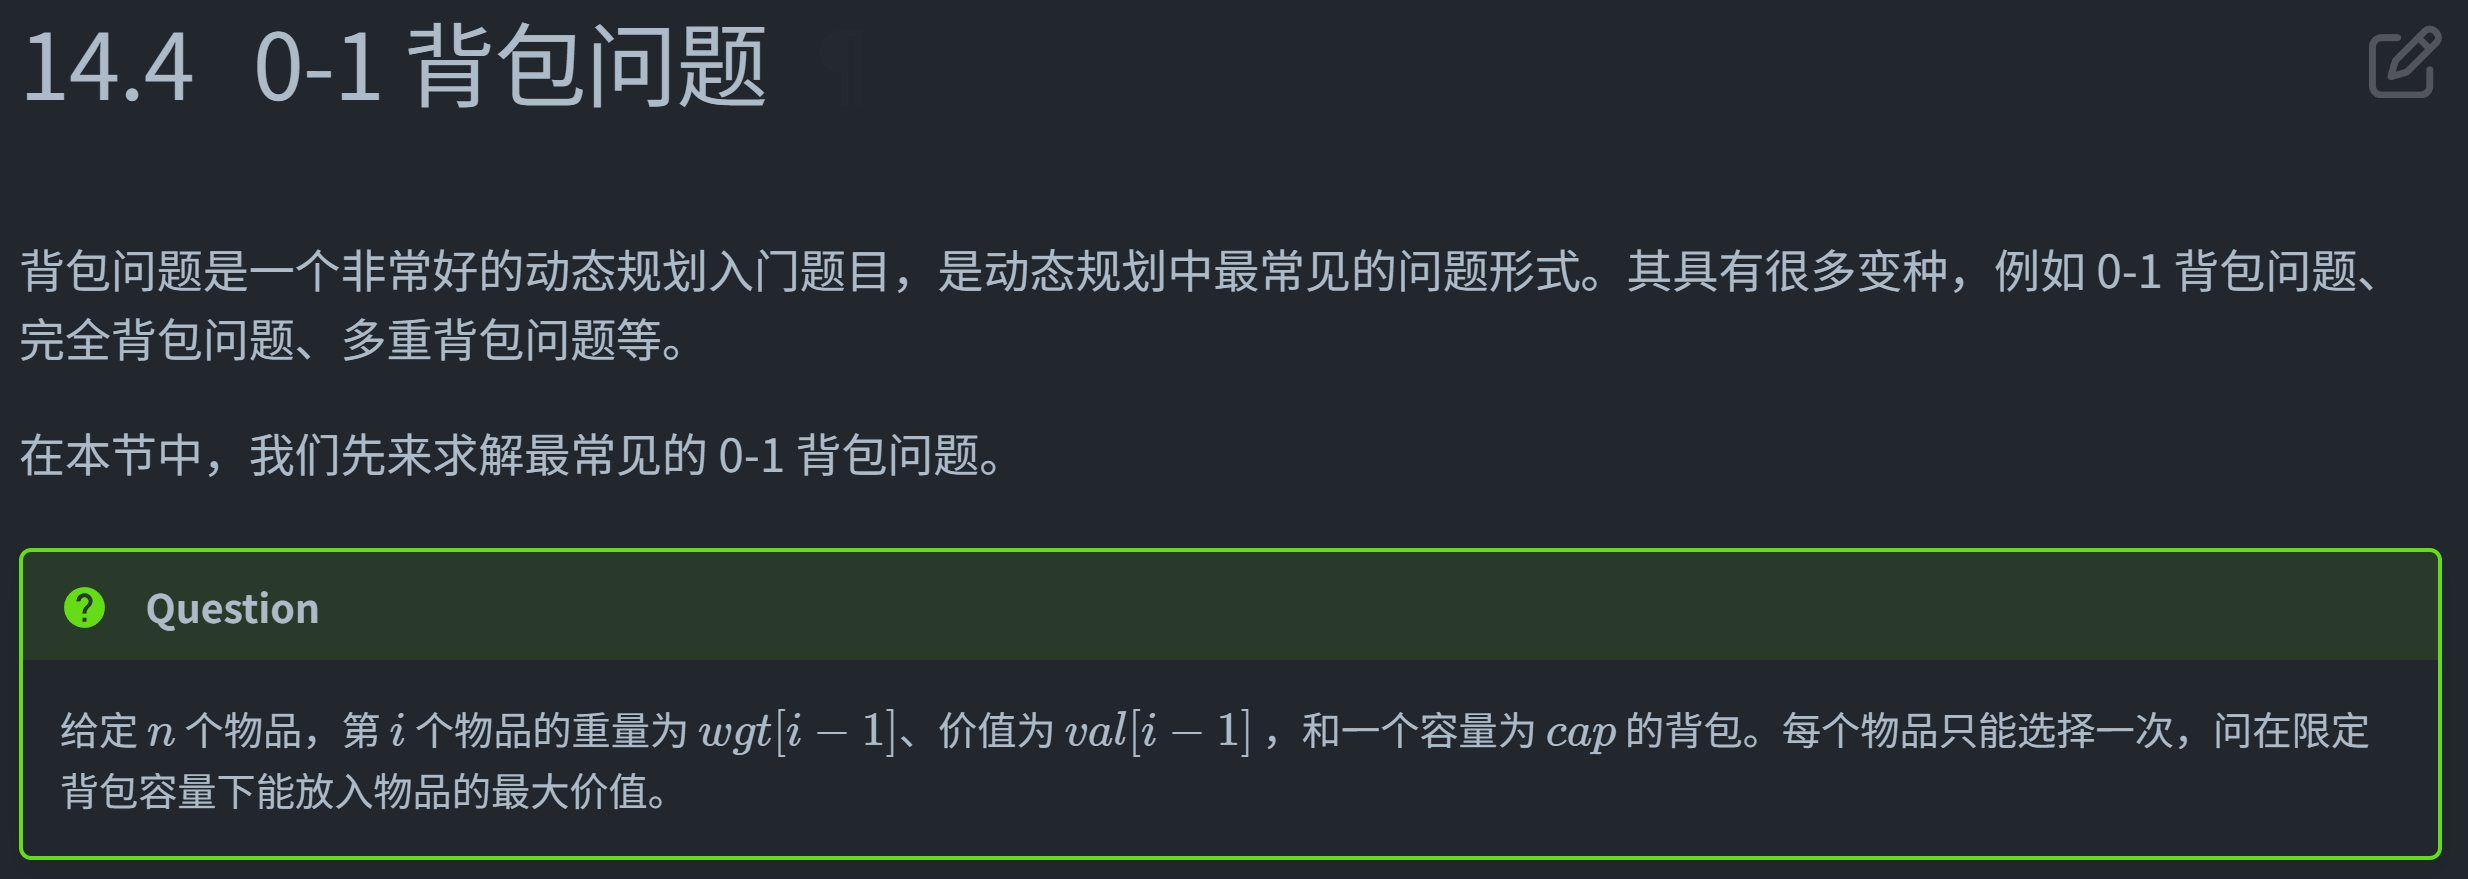
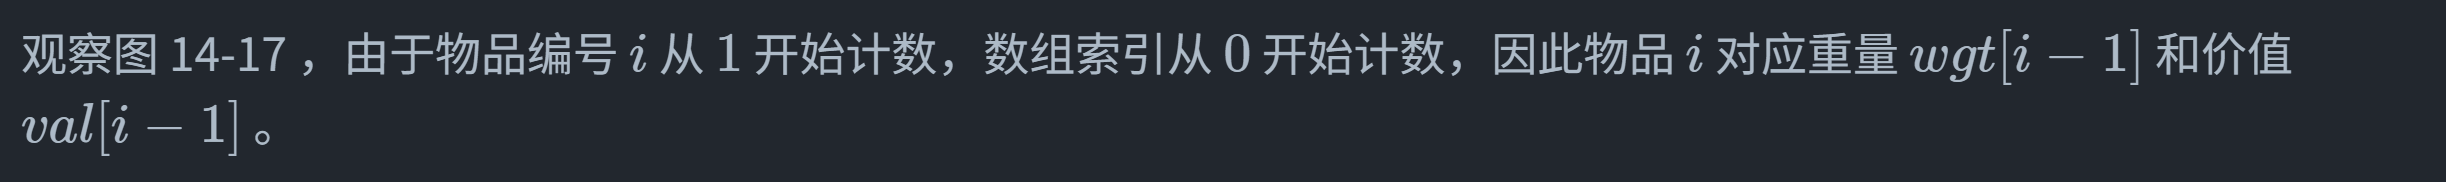
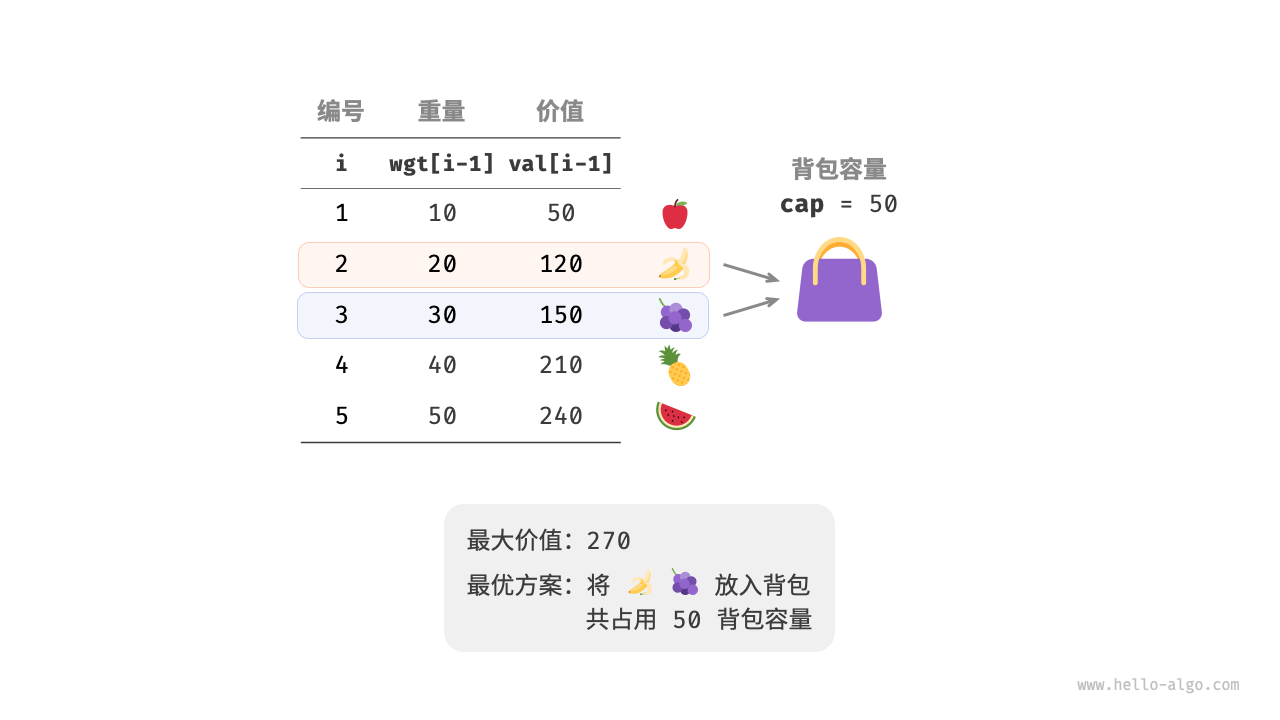
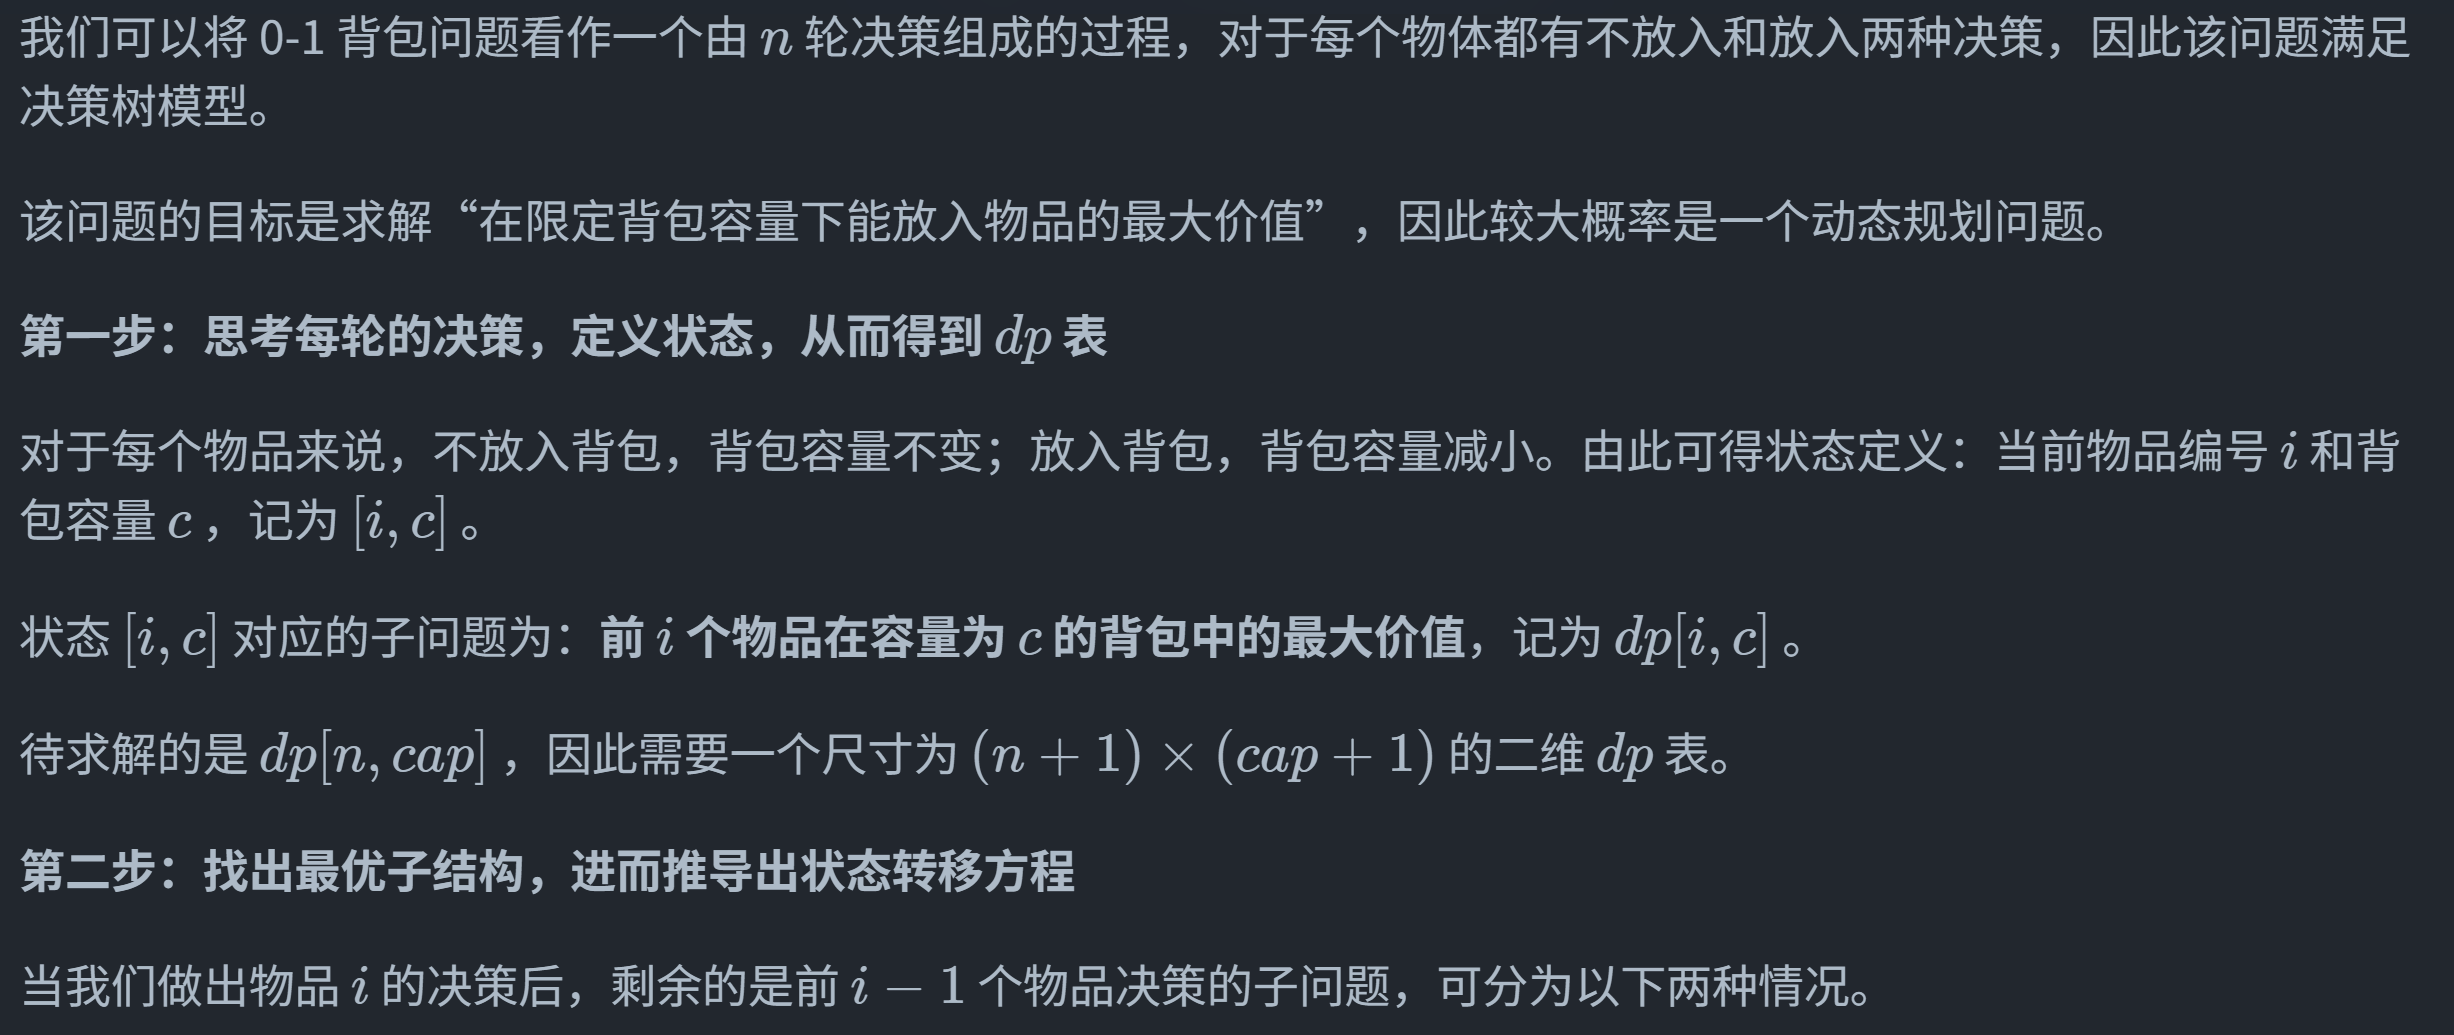
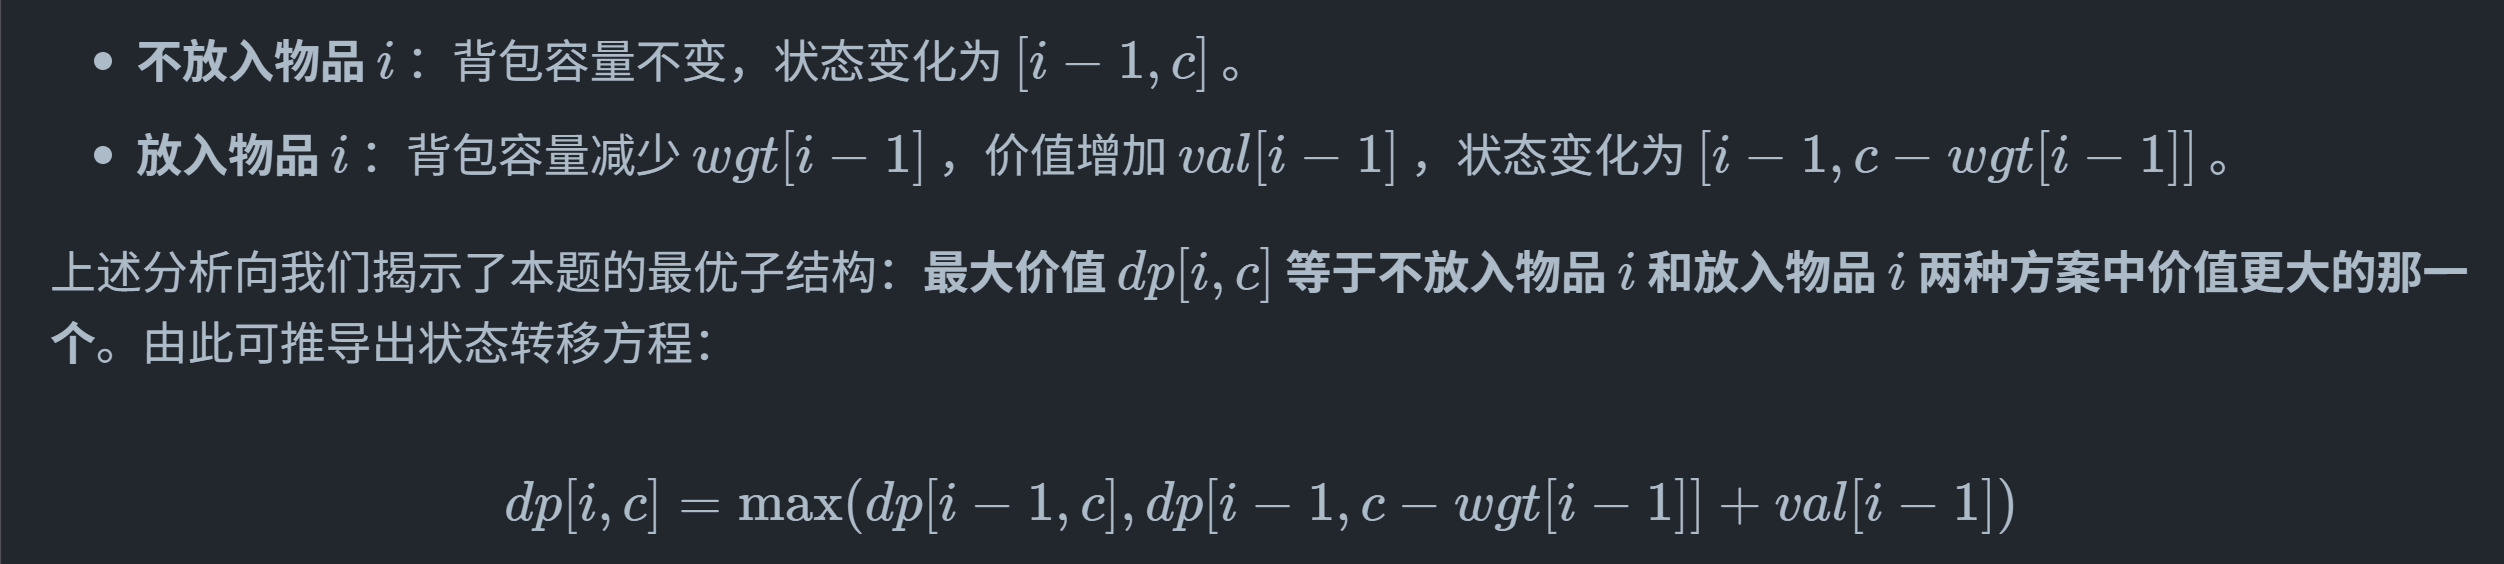
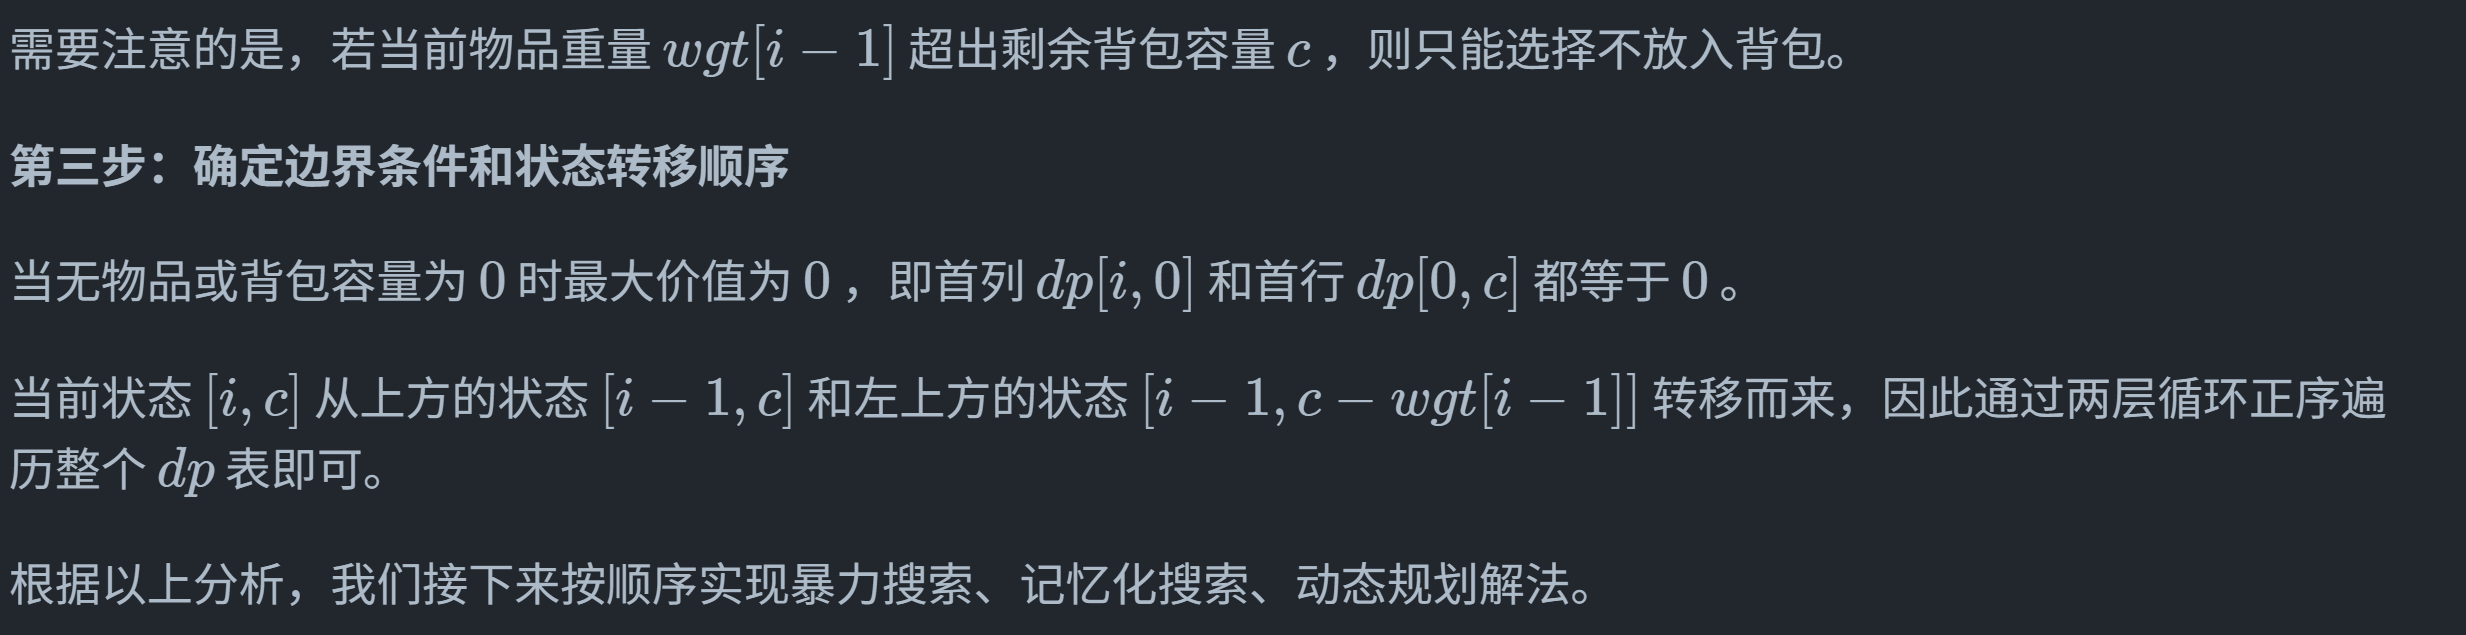
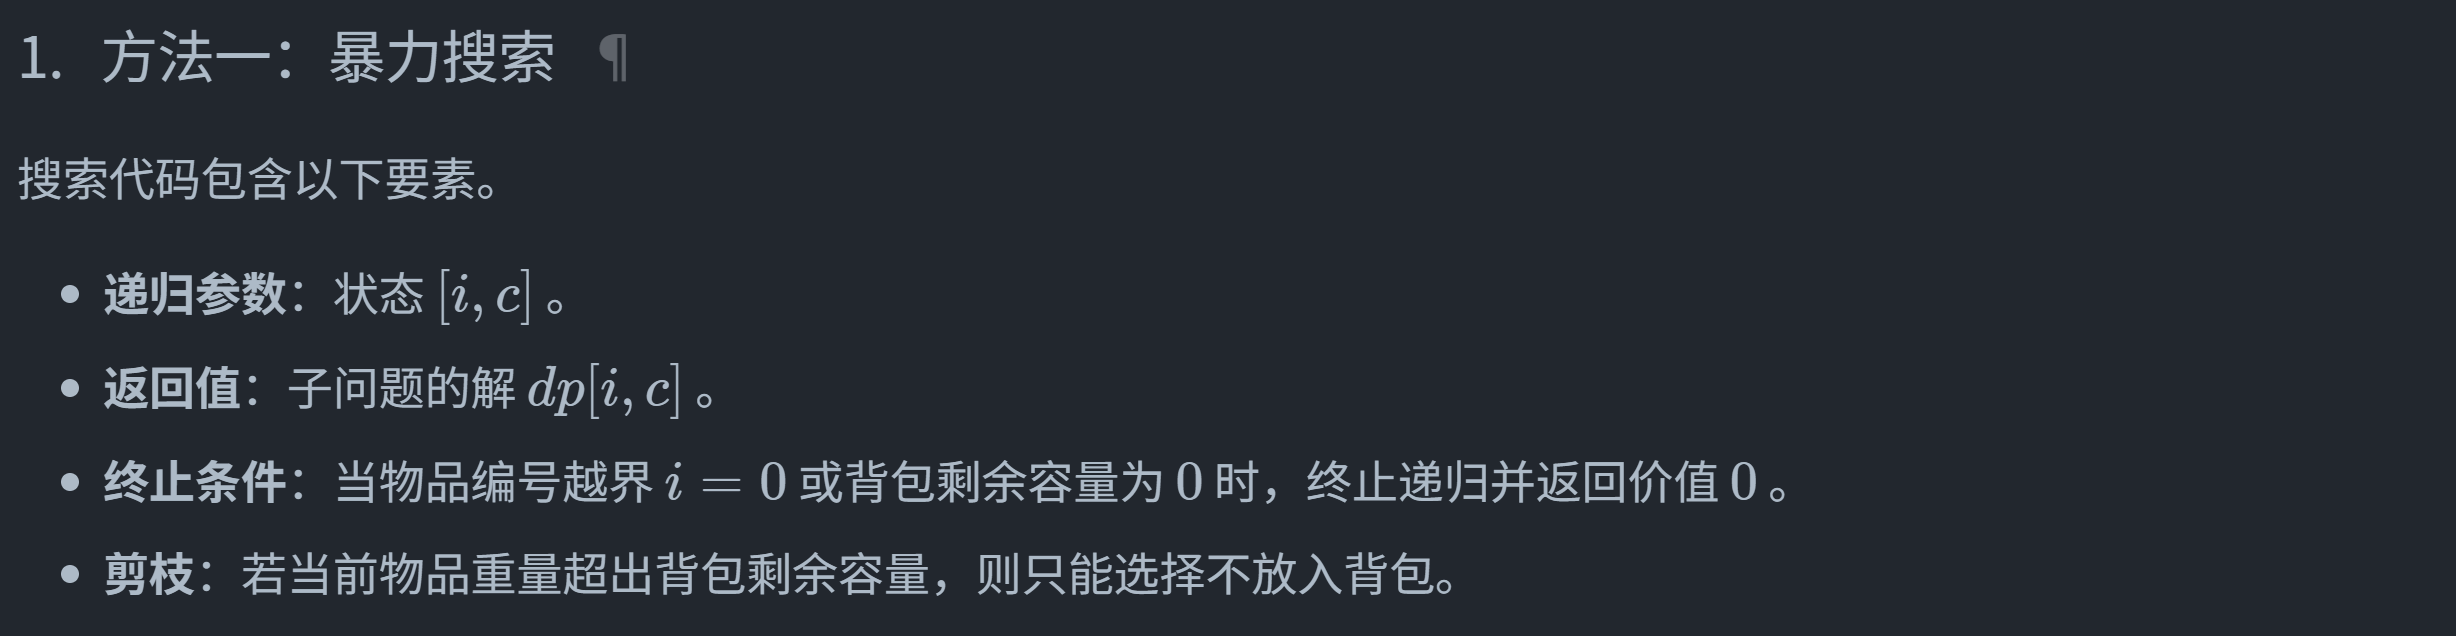

In [1]:
def knapsack_dfs(wgt: list[int], val: list[int], i: int, c: int) -> int:
    """0-1 背包：暴力搜索"""
    # 若已选完所有物品或背包无剩余容量，则返回价值 0
    if c == 0 or i == 0:
        return 0
    # 若超过背包容量，则只能选择不放入背包
    if wgt[i - 1] > c:
        return knapsack_dfs(wgt, val, i - 1, c)
    # 计算不放入和放入物品 i 的最大价值
    no = knapsack_dfs(wgt, val, i - 1, c)
    yes = knapsack_dfs(wgt, val, i - 1, c - wgt[i - 1]) + val[i - 1]
    # 返回两种方案中价值更大的一个
    return max(no, yes)

In [2]:
"""Driver Code"""
if __name__ == "__main__":
    wgt = [10, 20, 30, 40, 50]
    val = [50, 120, 150, 210, 240]
    cap = 50
    n = len(wgt)

    # 暴力搜索
    res = knapsack_dfs(wgt, val, n, cap)
    print(f"不超过背包容量的最大物品价值为 {res}")

不超过背包容量的最大物品价值为 270


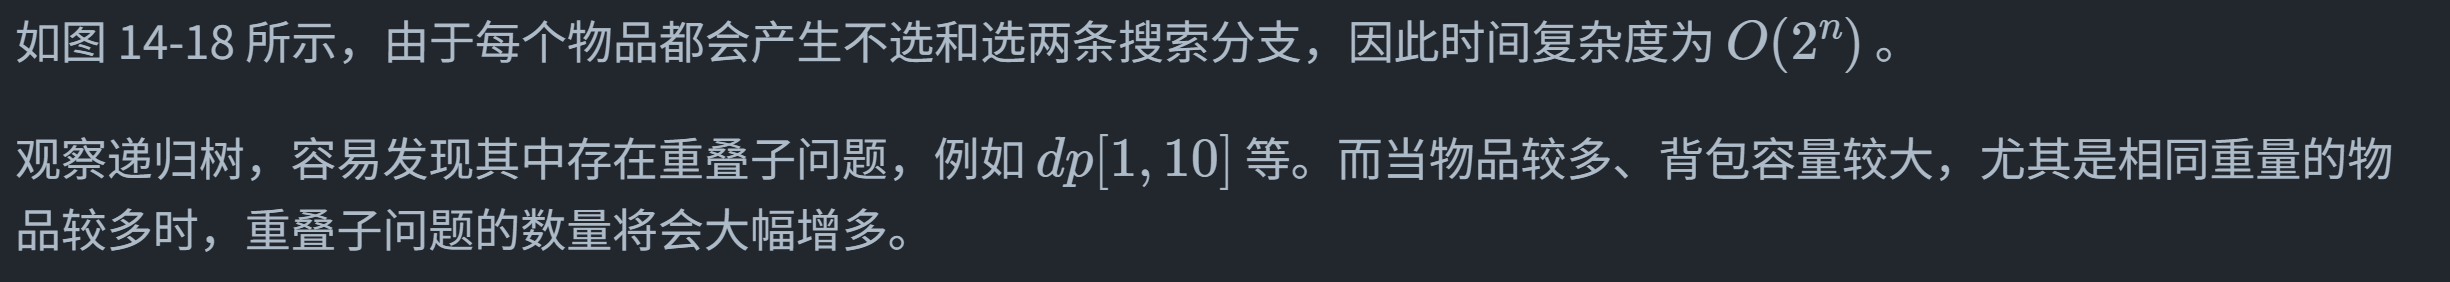
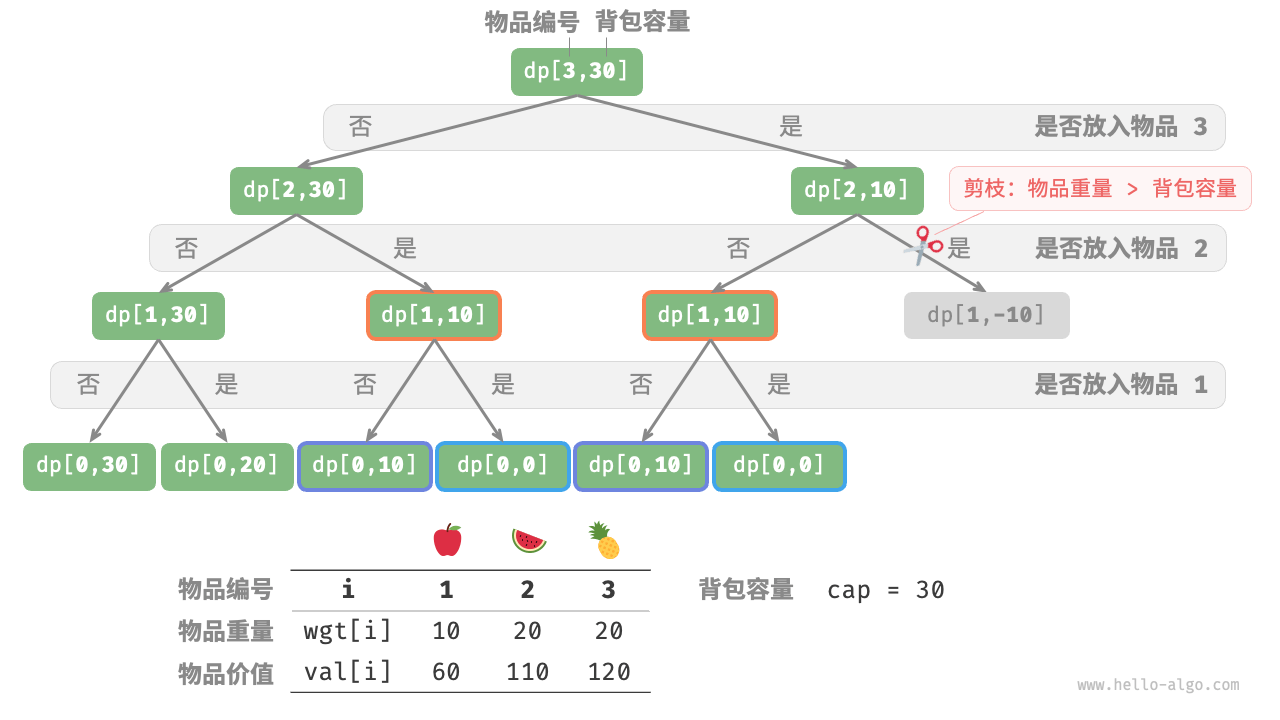
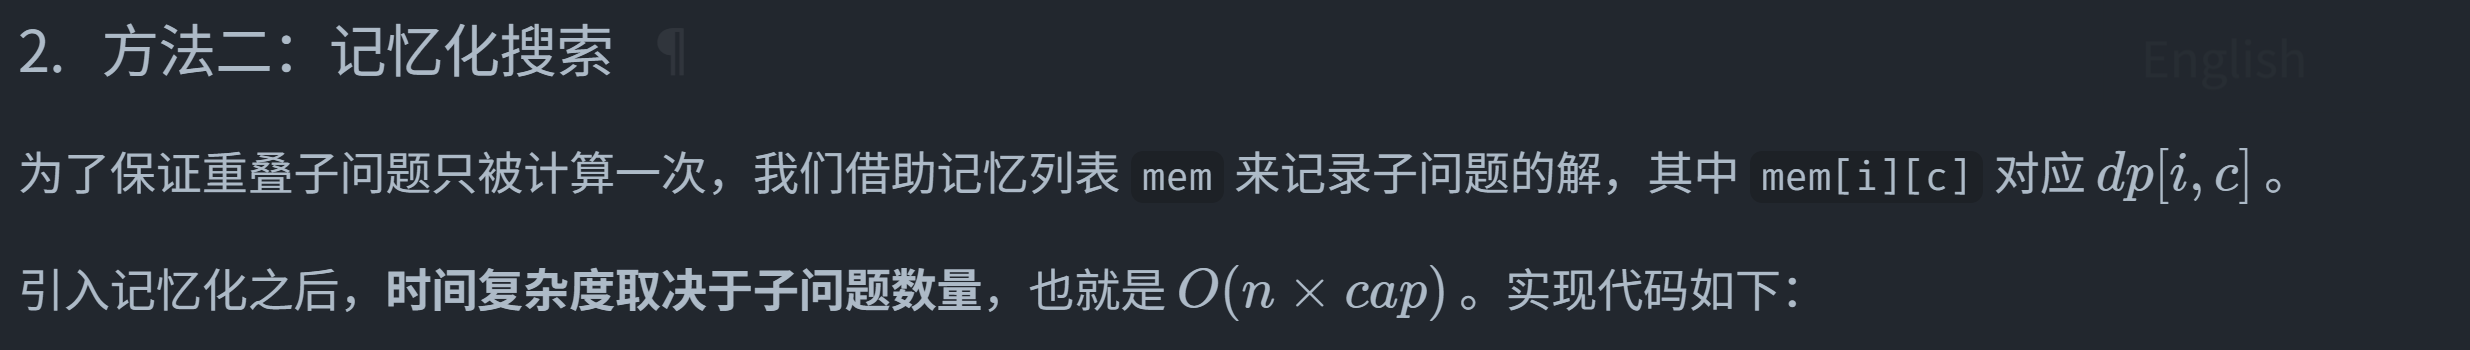

In [1]:
def knapsack_dfs_mem(wgt: list[int], val: list[int], mem: list[list[int]], i: int, c: int):
    """0-1 背包: 记忆化搜索"""
    # 若已选完所有物品或背包无剩余容量，则返回价值 0
    if i == 0 or c == 0:
        return 0
    # 若已有记录，则直接返回
    if mem[i][c] != -1:
        return mem[i][c]
    # 若超过背包容量，则只能选择不放入背包
    if wgt[i - 1] > c:
        return knapsack_dfs_mem(wgt, val, mem, i - 1, c)
    # 计算不放入和放入物品 i 的最大价值
    no = knapsack_dfs_mem(wgt, val, mem, i - 1, c)
    yes = knapsack_dfs_mem(wgt, val, mem, i - 1, c - wgt[i - 1]) + val[i - 1]
    mem[i][c] = max(no, yes)
    return mem[i][c]

In [2]:
"""Driver Code"""
if __name__ == "__main__":
    wgt = [10, 20, 30, 40, 50]
    val = [50, 120, 150, 210, 240]
    cap = 50
    n = len(wgt)

    # 记忆化搜索
    mem = [[-1] * (cap + 1) for _ in range(n + 1)]
    res = knapsack_dfs_mem(wgt, val, mem, n, cap)
    print(f"不超过背包容量的最大物品价值为 {res}")

不超过背包容量的最大物品价值为 270


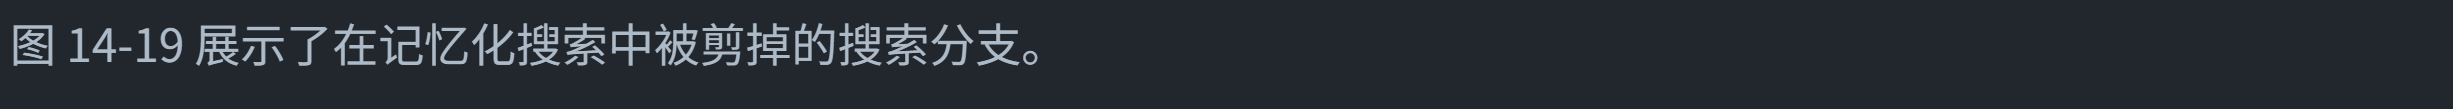
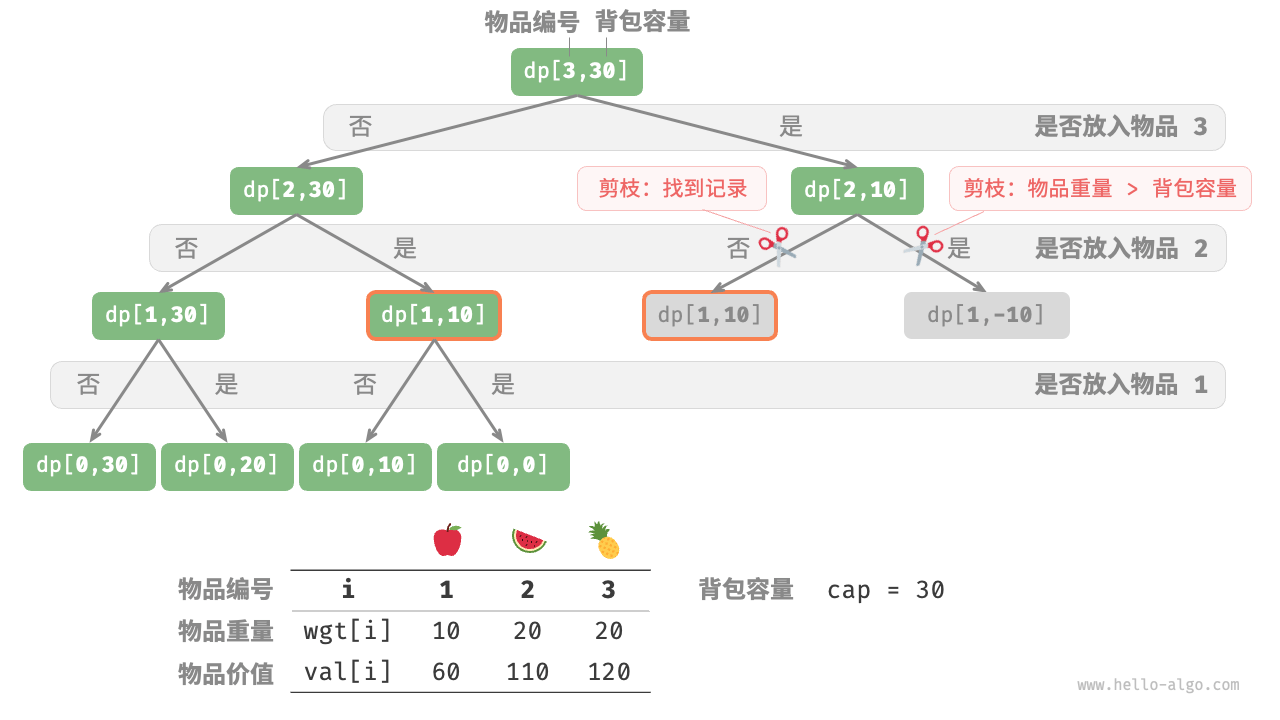
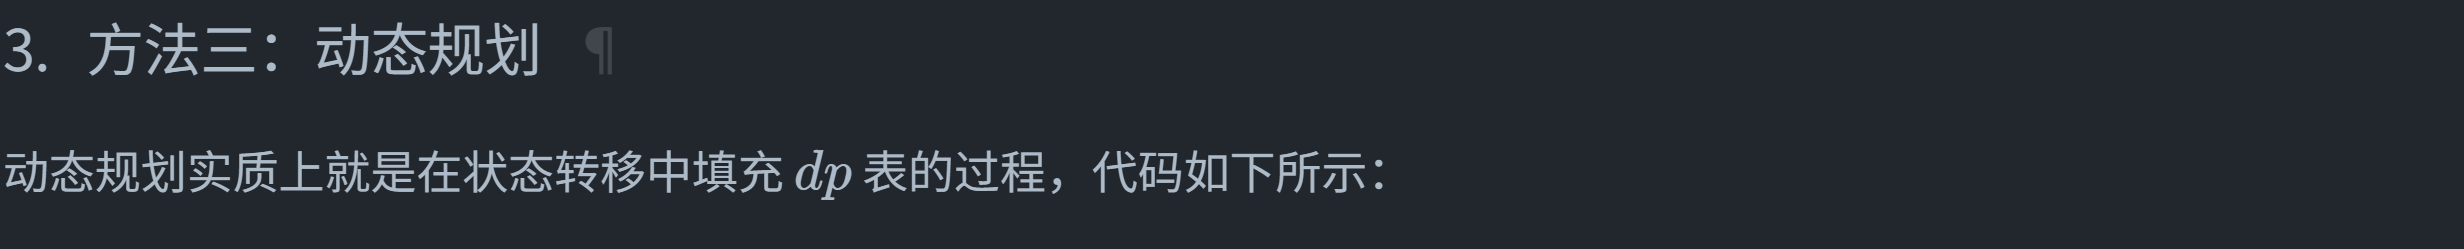

In [3]:
def knapsack_dp(wgt: list[int], val: list[int], cap: int) -> int:
    """0-1 背包：动态规划"""
    n = len(wgt)
    # 初始化 dp 表 (n+1)行, cap列
    dp = [[0] * (cap + 1) for _ in range(n + 1)]
    # 状态转移
    for i in range(1, n + 1):
        for c in range(1, cap + 1):
            if wgt[i - 1] > c:
                # 若超过背包容量, 则不选物品 i
                dp[i][c] = dp[i - 1][c]
            else:
                # 不选和选物品 i 这两种方案的较大值
                dp[i][c] = max(dp[i - 1][c], dp[i - 1][c - wgt[i - 1]] + val[i - 1])
    return dp[n][cap]

In [5]:
"""Driver Code"""
if __name__ == "__main__":
    wgt = [10, 20, 30, 40, 50]
    val = [50, 120, 150, 210, 240]
    cap = 50
    n = len(wgt)

    # 动态规划
    res = knapsack_dp(wgt, val, cap)
    print(f"不超过背包容量的最大物品价值为 {res}")

不超过背包容量的最大物品价值为 270


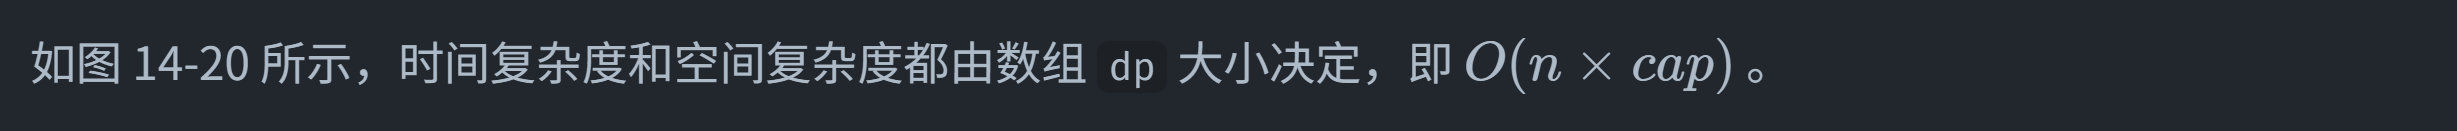
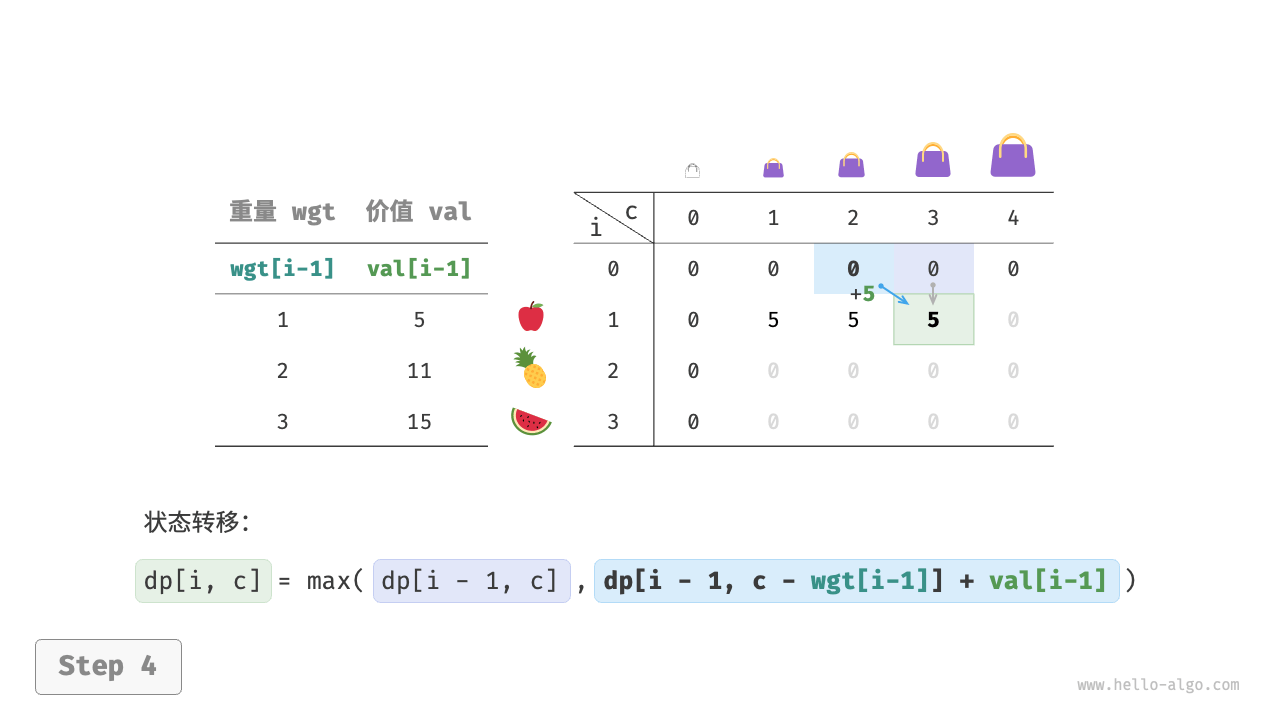
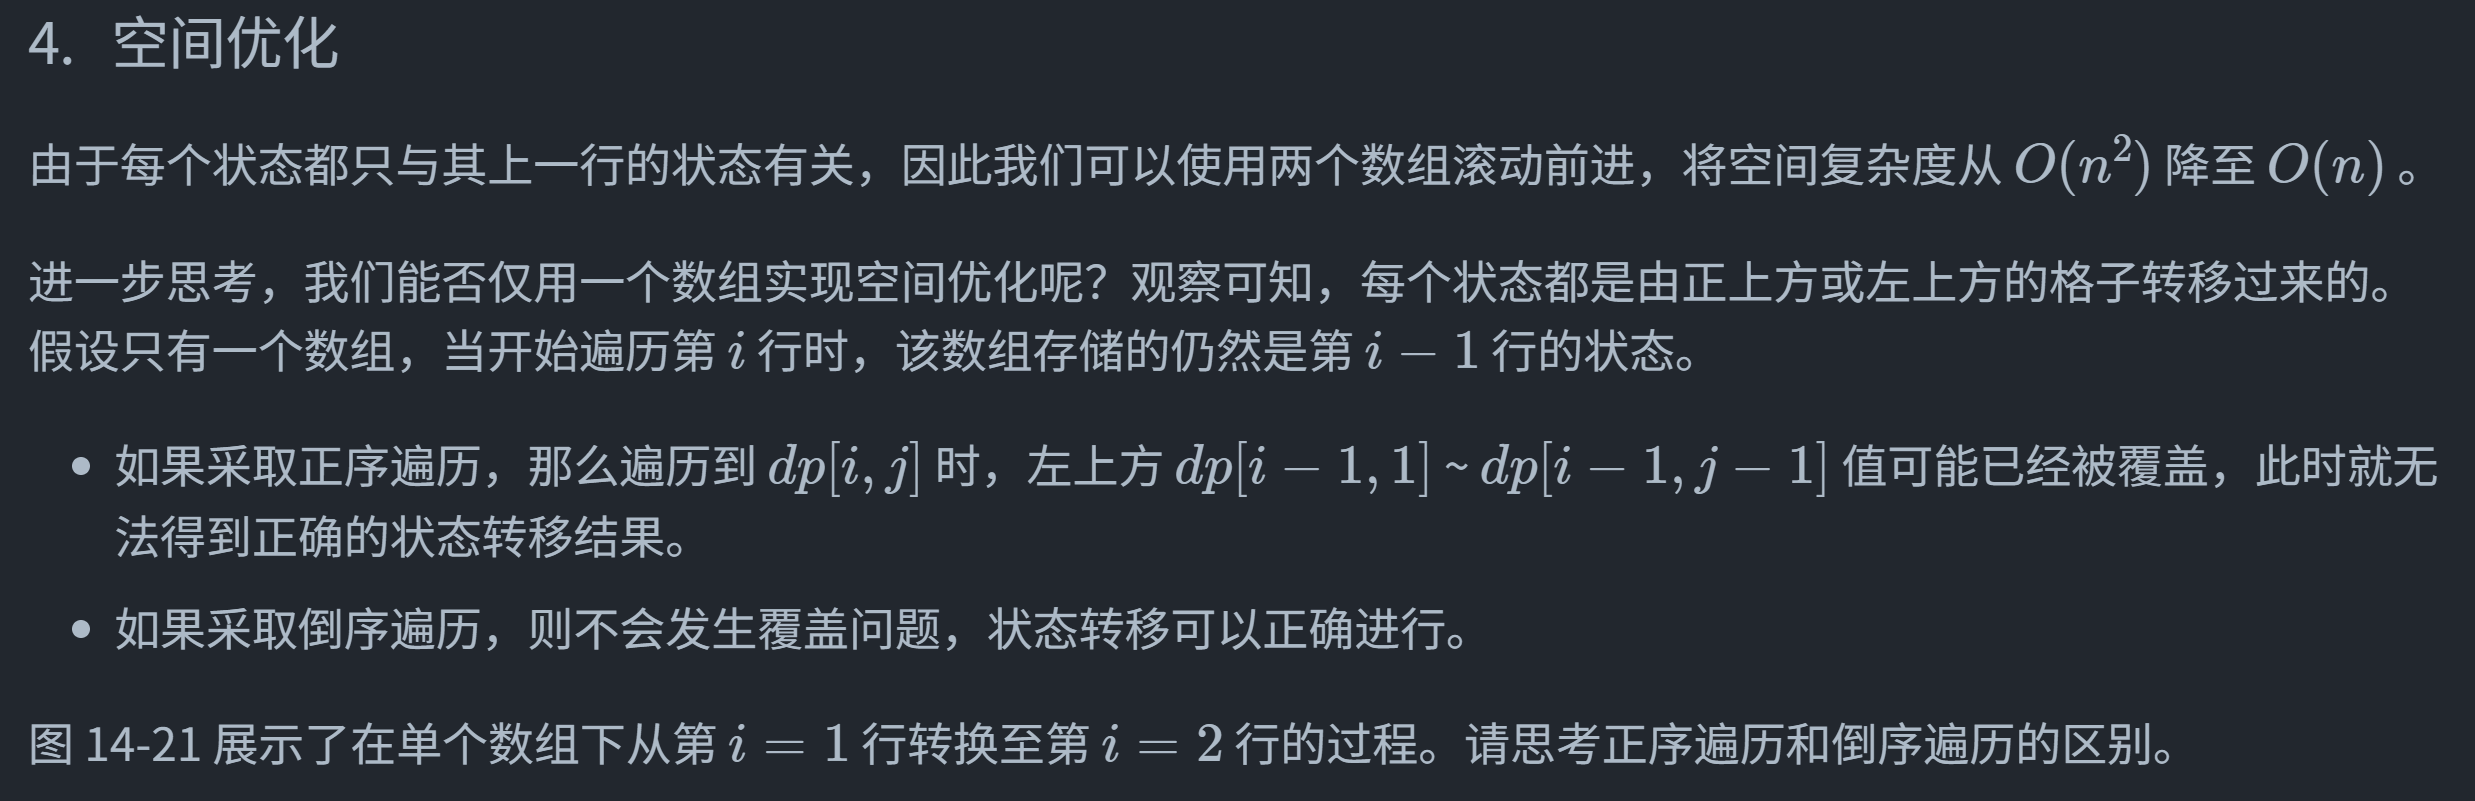
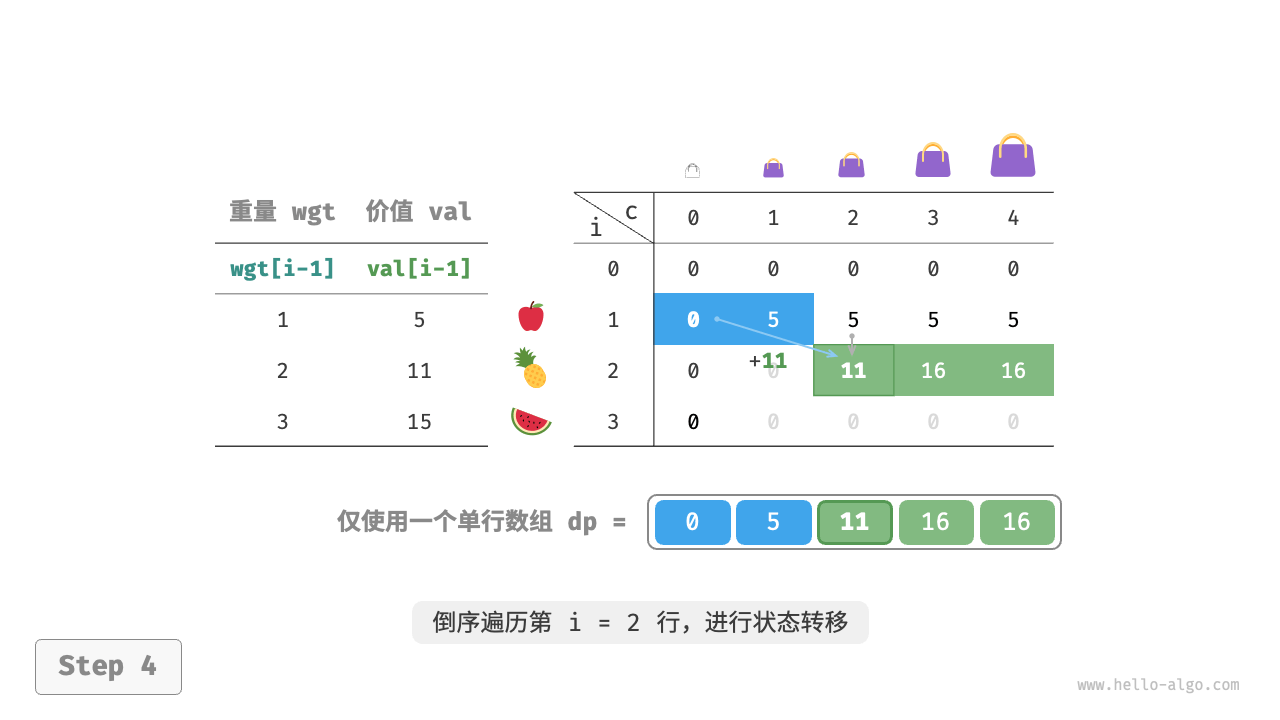
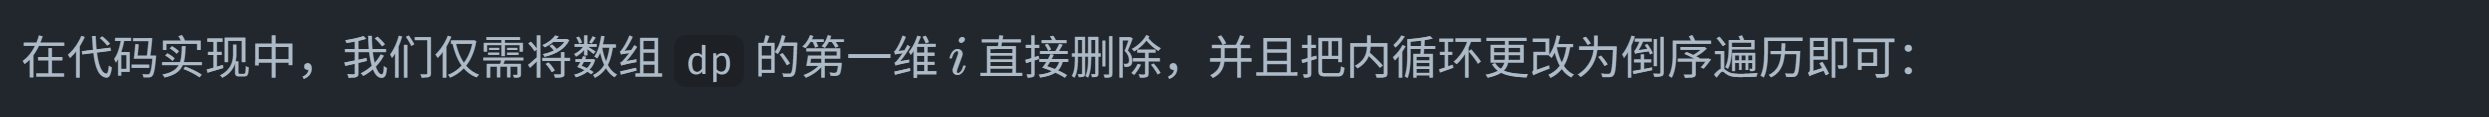

In [6]:
def knapsack_dp_comp(wgt: list[int], val: list[int], cap: int) -> int:
    """0-1 背包：空间优化后的动态规划"""
    n = len(wgt)
    # 初始化 dp 表
    dp = [0] * (cap + 1)
    # 状态转移
    for i in range(1, n + 1):
        # 倒序遍历
        for c in range(cap, 0, -1):
            if wgt[i - 1] > c:
                # 若超过背包容量，则不选物品 i
                dp[c] = dp[c]
            else:
                # 不选和选物品 i 这两种方案的较大值
                dp[c] = max(dp[c], dp[c - wgt[i - 1]] + val[i - 1])
    return dp[cap]